In [1]:
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_E6oV3lV.csv',encoding='GB18030')
df.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒聼聵聧冒...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

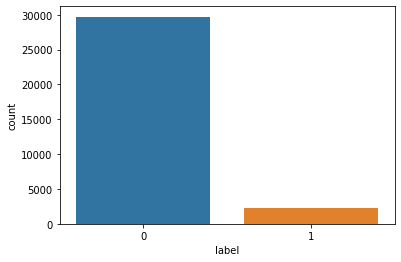

In [3]:
import seaborn as sns
sns.countplot(df['label'])

In [4]:
tweets = df['tweet'].values.tolist()
tweets_ = []
words=[]

ps=PorterStemmer()

emoji = re.compile("["
                      u"\U0001F600-\U0001FFFF"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
       
for tweet in tweets:

    tw = tweet.lower()
    tw = pattern.sub('',tw)
    tw = re.sub(r"[,.\"!@$%^&*(){}?''/_;`~:<>+=-]", "", tw)
    tw = re.sub('#',' ',tw)
    tw = re.sub('\[','',tw)
    tw = re.sub(']','',tw)
    tw = emoji.sub(r'',tw)
    tw = re.sub('user','',tw)
    tw = re.sub(r"[0123456789]",'',tw)
    tw = re.sub('  ',' ',tw)
    
    tokens=word_tokenize(tw)
    
    stop_words = set(stopwords.words("english"))
    
    temp = []
    
    for i in tokens:
        if i not in stop_words:
            temp.append(ps.stem(i))
            words.append(i)
    
    
    temp = ' '.join(temp)
    
    tweets_.append(temp)

In [5]:
tweets_

['father dysfunct selfish drag kid dysfunct run',
 'thank lyft credit cant use caus dont offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'camp tomorrow danni',
 'next school year year exam cant think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'welcom im gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouchjunior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around via ig cooki make peopl',
 'know essenti oil made ch

In [6]:
#pip install wordcloud

In [22]:
l = np.array(df["tweet"][df["label"]==1])
offensive_words = []

for i in l:
    w=word_tokenize(i)
    for j in w: 
        offensive_words.append(j)

In [7]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

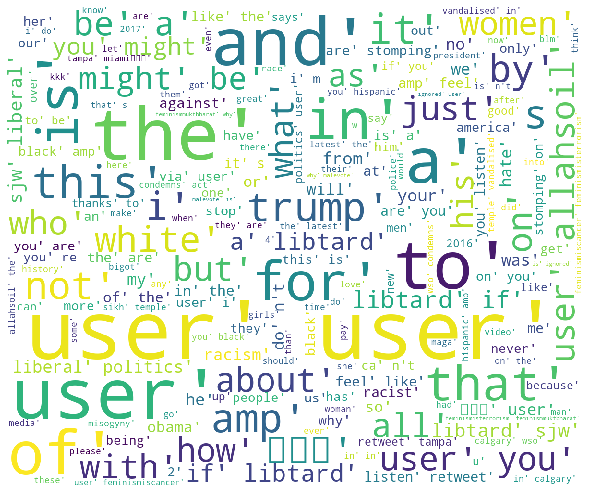

In [23]:
stopwords=set(STOPWORDS)

wordcloud = WordCloud(width = 1200, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str(offensive_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
x=tweets_
y=df["label"]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [12]:
x_test_vectorizer=count.transform(x_test)
#x_train_vectorizer.toarray()

In [13]:
count.vocabulary_

{'weekend': 385293,
 'world': 395121,
 'realli': 288327,
 'bonker': 40889,
 'bad': 24007,
 'atm': 20217,
 'shoot': 313072,
 'deathstrok': 82796,
 'violenc': 375038,
 'hooligan': 165324,
 'euro': 103197,
 'world realli': 395649,
 'realli bonker': 288387,
 'bonker realli': 40890,
 'realli bad': 288358,
 'bad atm': 24018,
 'atm shoot': 20235,
 'shoot deathstrok': 313145,
 'deathstrok violenc': 82797,
 'violenc hooligan': 375076,
 'hooligan euro': 165327,
 'world realli bonker': 395650,
 'realli bonker realli': 288388,
 'bonker realli bad': 40891,
 'realli bad atm': 288362,
 'bad atm shoot': 24019,
 'atm shoot deathstrok': 20236,
 'shoot deathstrok violenc': 313146,
 'deathstrok violenc hooligan': 82798,
 'violenc hooligan euro': 375077,
 'world realli bonker realli': 395651,
 'realli bonker realli bad': 288389,
 'bonker realli bad atm': 40892,
 'realli bad atm shoot': 288363,
 'bad atm shoot deathstrok': 24020,
 'atm shoot deathstrok violenc': 20237,
 'shoot deathstrok violenc hooligan': 

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)
#x_train_tfidf = np.array(x_train_tfidf)

x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [19]:
xgb_model_vectorizer = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[7403   29]
 [ 401  158]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.84      0.28      0.42       559

    accuracy                           0.95      7991
   macro avg       0.90      0.64      0.70      7991
weighted avg       0.94      0.95      0.93      7991

